Computer vision projects on classifying traffic sign. 

From exporation, there are 34799 training sets and 12630 testing sets. 
Each of the image has 32*32*3.
Roughly around 40+ classes.
The goal is to leverage a unbalance and relativity speaking small dataset to classify with deep neuarl networking.

Recall from deep learning foundations course from deeplearning.ai, classic machine learning requires around 100-10,000 samples and deep learning requires around 1 million sample. 

Given neural network does not require any data balance having each class, I would like to see the difference between data split and also data size. 

In [1]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import cv2
import tensorflow as tf

# Visualizations will be shown in the notebook.
%matplotlib inline

training_file = "./traffic-signs-data/train.p"
validation_file = "./traffic-signs-data/test.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, Y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#signnames = pd.read_csv('signnames.csv')
with open('signnames.csv', mode='r') as f:
    reader = csv.reader(f)
    next(reader)  # skip the header
    signnames = {rows[0]: rows[1] for rows in reader}
label_names = list(signnames)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("Y_valid shape", X_valid.shape)
print("Y_valid shape", Y_valid.shape)
print("Y_train shape", X_train.shape)
print("Y_test shape", X_test.shape)

X_train shape (34799, 32, 32, 3)
X_test shape (12630, 32, 32, 3)
Y_valid shape (12630, 32, 32, 3)
Y_valid shape (12630,)
Y_train shape (34799, 32, 32, 3)
Y_test shape (12630, 32, 32, 3)


In [2]:
signnames 

{'0': 'Speed limit (20km/h)',
 '1': 'Speed limit (30km/h)',
 '10': 'No passing for vehicles over 3.5 metric tons',
 '11': 'Right-of-way at the next intersection',
 '12': 'Priority road',
 '13': 'Yield',
 '14': 'Stop',
 '15': 'No vehicles',
 '16': 'Vehicles over 3.5 metric tons prohibited',
 '17': 'No entry',
 '18': 'General caution',
 '19': 'Dangerous curve to the left',
 '2': 'Speed limit (50km/h)',
 '20': 'Dangerous curve to the right',
 '21': 'Double curve',
 '22': 'Bumpy road',
 '23': 'Slippery road',
 '24': 'Road narrows on the right',
 '25': 'Road work',
 '26': 'Traffic signals',
 '27': 'Pedestrians',
 '28': 'Children crossing',
 '29': 'Bicycles crossing',
 '3': 'Speed limit (60km/h)',
 '30': 'Beware of ice/snow',
 '31': 'Wild animals crossing',
 '32': 'End of all speed and passing limits',
 '33': 'Turn right ahead',
 '34': 'Turn left ahead',
 '35': 'Ahead only',
 '36': 'Go straight or right',
 '37': 'Go straight or left',
 '38': 'Keep right',
 '39': 'Keep left',
 '4': 'Speed lim

In [3]:
y_train_df = pd.DataFrame()
y_train_df['label'] = y_train

# Get current size
figsize=(15, 7)
 
# Prints: [8.0, 6.0]
names = list(signnames)
item, count = np.unique(y_train, return_counts=True)
freq = np.array((item, count)).T
plt.figure(11)
plt.yticks(range(len(y_train)), names.SignName)
#plt.yticks(list(map(lambda x: label_dict[x], y_train['label'].value_counts().index.tolist())))            
plt.barh(item, count, alpha=0.3)
plt.title('Traffic Sign Data Distrubition')

plt.show()

AttributeError: 'list' object has no attribute 'SignName'

<Figure size 432x288 with 0 Axes>

In [9]:
#def normalize(img):
#    img = (img- 128)/128
#    return img.astype(np.float32)
#old preprocessing
def preprocess(img):
    img = np.sum(img/3, axis=3, keepdims = True)
    img = img.astype(float) / 255.0
    return np.array(img).reshape((-1,32,32,1)) 


#def preprocess(img):
#    image= [] 
#    for i in img:
#        image.append(normalize(i))
#    return np.array(image).reshape((-1,32,32,1))  


#def preprocess(img):
    #normalizations 
#    image = []
#    for i in range(0,len(img)):
#        images = img[i]
#        cv2.cvtColor(img[i], cv2.COLOR_BGR2YCrCb)
#        cv2.normalize(images, images, 0, 10, norm_type=cv2.NORM_MINMAX)
#        image.append(images)
#    return np.reshape(image, (-1, 32, 32, 1))

        #resized_image = cv2.resize(img, (32, 32)) 
        #np.array(img[i]).reshape((-1,32,32,1)) 
        #image.append(normalize(grayscale(img[i])))
    #img = (img-128)/128
    #img = np.array(img / 255.0 - 0.5 )
    #img = np.sum(img/3, axis=3, keepdims = True)
    #img = img.astype(float) / 255.0

X_train= preprocess(X_train)
X_test= preprocess(X_test)
X_valid = preprocess(X_valid)
n_classes = len(np.unique(y_train))


In [10]:
#shuffle the data afterwards 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.02, random_state=0)


print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("Y_valid shape", X_validation.shape)

X_train shape (34103, 32, 32, 1)
X_test shape (12630, 32, 32, 1)
Y_valid shape (696, 32, 32, 1)


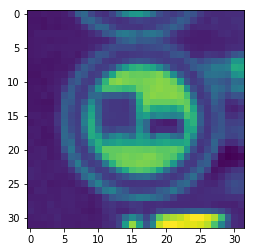

In [11]:
#each time it will show a different image
import random
def showImg(data):
    random = np.random.randint(len(data))
    image = data[random].squeeze()
    plt.figure()
    plt.imshow(image)
    
showImg(X_train)

#first plug into CNN and see how does the accuracy goes

In [12]:
import tensorflow as tf
EPOCHS = 30
BATCH_SIZE = 64

In [13]:
#applying leNet in Tensorflow

from tensorflow.contrib.layers import flatten
def LeNet(x):    
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat_v2([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 5: Fully Connected. Input = 120. Output = 84.
    #W5 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    #b5 = tf.Variable(tf.zeros(84)) 
    #x = tf.add(tf.matmul(x, W5), b5)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 6: Fully Connected. Input = 84. Output = 43.
    #W6 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    #b6 = tf.Variable(tf.zeros(43)) 
    #logits = tf.add(tf.matmul(x, W6), b6)
    
    return logits


In [14]:
#(BATCH_SIZE, height, width, depth)
x = tf.placeholder(tf.float32, (None, 32, 32, 1))

# Placeholder for labels
y = tf.placeholder(tf.int32, (None))

# One-hot encoding of labels
one_hot_y = tf.one_hot(y, 43)

# Probability to keep units
keep_prob = tf.placeholder(tf.float32)

In [15]:
# Learning rate
rate = 0.001
mu = 0 
sigma = 0.1
# Pass input data to the LeNet function
logits = LeNet(x)

# Compare logits to the ground-truth labels and calculate the cross entropy
# Cross entopy is a measure how different the logits
# are from the ground-truth training labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
# Average the cross entropy from all the training images
loss_operation = tf.reduce_mean(cross_entropy)
# Use Adam algorithm (alternative of stochastic gradient descent)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# Optimizer uses backpropagation to update the network and minimize training loss
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)


In [16]:
# Compare the logit prediction to the one hot encoded ground-truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
# Calculate the model's overall accuracy by averaging the individual prediction accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
# Create the TensorFlow session and Initialize the variables
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training in progress...")
    print()
    for i in range(EPOCHS):
        # Shuffle the training data to ensure that trainint isn't biased
        # by the order of the images
        X_train, y_train = shuffle(X_train, y_train)
        # Break training data into batches and train the model on the each batch
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob: 1.0})
        
        # In the end of each EPOCH evaluate the model on validation data
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, Y_valid)
        print("EPOCH {0} ...".format(i + 1))
        print("Training Accuracy = {:.5f}".format(training_accuracy))
        print("Validation Accuracy = {:.5f}".format(validation_accuracy))
        print()
    
    # Save the model
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet_sign_classifier')
    print("Model saved")

Training in progress...

EPOCH 1 ...
Training Accuracy = 0.91599
Validation Accuracy = 0.83325

EPOCH 2 ...
Training Accuracy = 0.95648
Validation Accuracy = 0.87245

EPOCH 3 ...
Training Accuracy = 0.98109
Validation Accuracy = 0.88804

EPOCH 4 ...
Training Accuracy = 0.98534
Validation Accuracy = 0.89089

EPOCH 5 ...
Training Accuracy = 0.98405
Validation Accuracy = 0.90198

EPOCH 6 ...
Training Accuracy = 0.99490
Validation Accuracy = 0.91156

EPOCH 7 ...
Training Accuracy = 0.99704
Validation Accuracy = 0.91544

EPOCH 8 ...
Training Accuracy = 0.99622
Validation Accuracy = 0.91481

EPOCH 9 ...
Training Accuracy = 0.99675
Validation Accuracy = 0.91370

EPOCH 10 ...
Training Accuracy = 0.99631
Validation Accuracy = 0.91227

EPOCH 11 ...
Training Accuracy = 0.99645
Validation Accuracy = 0.91441

EPOCH 12 ...
Training Accuracy = 0.99798
Validation Accuracy = 0.91908

EPOCH 13 ...
Training Accuracy = 0.99900
Validation Accuracy = 0.92423

EPOCH 14 ...
Training Accuracy = 0.99704
Validat

In [18]:
#saver = tf.train.Saver()

with  tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.5f}".format(train_accuracy))
    valid_accuracy = evaluate(X_valid, Y_valid)
    print("Validation Accuracy = {:.5f}".format(valid_accuracy))

Train Accuracy = 1.00000
Validation Accuracy = 0.93515


In [25]:
with  tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    Test_accuracy = evaluate(X_train, y_train)
    print("Test Accuracy = {:.5f}".format(Test_accuracy))

Validation Accuracy = 1.00000


In [23]:
import pickle
import tensorflow as tf
import numpy as np
from keras.layers import Input, Flatten, Dense
from keras.models import Model

I have been playing around with different preprocessing such as grayscale, normalize and reshaping. Tho Training accuracy has a 0.996 accuracy and Validation has close to 0.914 accuracy, yet it seems low. 
in this case, I am planning to generated more data. 

# Question 3
What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) For reference on how to build a deep neural network using TensorFlow, see Deep Neural Network in TensorFlow from the classroom

1: 1x1 convolution (+relu) in order for TF to calculate which channel to use
2: 3x3 convolution (+relu) with 32 outputs
3: 3x3 convolution (+relu) with 32 outputs
4: 3x3 convolution (+relu) with 32 outputs
5: 2x2 MaxPool (with stride 2) that reduces the image size to 16x16
6: Dropout (0.5 during training, 1.0 during validation / testing)
7: 3x3 convolution (+relu) with 64 outputs
8: 3x3 convolution (+relu) with 64 outputs
9: 3x3 convolution (+relu) with 64 outputs
10: 2x2 MaxPool (with stride 2) that reduces the image size to 8x8
11: Dropout (0.5 during training, 1.0 during validation / testing)
12: Fully connected layer (+relu) with flattened inputs from step 6 and 11 with 12288 inputs and 512 outputs
13: Dropout (0.5 during training, 1.0 during validation / testing)
14: Fully connected layer (+relu) with 512 inputs and 43 (class) outputs

In [ ]:

from tensorflow.contrib.layers import flatten
KEEP_PROB = 0.5

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[3, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')


In [ ]:
# Define all network parameters# Define 
mu = 0
sigma = 0.1

# and training parameters
epochs = 20
batch_size = 128

In [ ]:
#applying leNet in Tensorflow

from tensorflow.contrib.layers import flatten
def LeNet(x):    
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat_v2([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 5: Fully Connected. Input = 120. Output = 84.
    #W5 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    #b5 = tf.Variable(tf.zeros(84)) 
    #x = tf.add(tf.matmul(x, W5), b5)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 6: Fully Connected. Input = 84. Output = 43.
    #W6 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    #b6 = tf.Variable(tf.zeros(43)) 
    #logits = tf.add(tf.matmul(x, W6), b6)
    
    return logits


In [ ]:
import tensorflow as tf
#features and labels
x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, n_classes)

In [ ]:
# Setting learning rate, loss functions, and optimizer
#training pipelines
rate = 0.004

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


Question 3
What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) For reference on how to build a deep neural network using TensorFlow, see Deep Neural Network in TensorFlow from the classroom.

5x5 convolution (32x32x1 in, 28x28x6 out)
ReLU
2x2 max pool (28x28x6 in, 14x14x6 out)
5x5 convolution (14x14x6 in, 10x10x16 out)
ReLU
2x2 max pool (10x10x16 in, 5x5x16 out)
5x5 convolution (5x5x6 in, 1x1x400 out)
ReLu
Flatten layers from numbers 8 (1x1x400 -> 400) and 6 (5x5x16 -> 400)
Concatenate flattened layers to a single size-800 layer
Dropout layer
Fully connected layer (800 in, 43 out)




#plug in web found image and see how work does the classifer work along with

In [183]:

import cv2
import os
label = np.zeros([28,35,25,9,25])
im1 = './traffic-signs-data/germansign/image1.jpg'
im2 = './traffic-signs-data/germansign/image2.jpg'
im3 = './traffic-signs-data/germansign/image3.jpg'
im4 = './traffic-signs-data/germansign/image4.jpg'
im5 = './traffic-signs-data/germansign/image5.jpg'
im_paths = [im1, im2, im3, im4, im5]
new_images = []
images = np.empty((0,32,32,3), dtype='float32')

for i in im_paths:
    img = cv2.imread(i)
    img = cv2.resize(img, (32,32))
    images = np.concatenate((images, img[np.newaxis,:,:,:]))
    
preprocessed_img = preprocess(images)
preprocessed_img.shape

(5, 32, 32, 1)

In [193]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    accuracy = evaluate(preprocessed_img, label)
    predicted_logits = sess.run(logits, feed_dict={x:preprocessed_img})
    predicted_labels = np.argmax(predicted_logits, axis=1)
    print("Accuracy = {:.5f}".format(predicted_logits))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_5' with dtype float
	 [[Node: Placeholder_5 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_5', defined at:
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-aa8d332546ca>", line 11, in <module>
    keep_prob = tf.placeholder(tf.float32)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1587, in placeholder
    name=name)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2043, in _placeholder
    name=name)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_5' with dtype float
	 [[Node: Placeholder_5 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [187]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = tf.nn.softmax(logits)
    result = sess.run(softmax, feed_dict={x:preprocessed_img})
    values, indices = tf.nn.top_k(result, 5)
    probs = sess.run(values)
    predictions = sess.run(indices)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_5' with dtype float
	 [[Node: Placeholder_5 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_5', defined at:
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-aa8d332546ca>", line 11, in <module>
    keep_prob = tf.placeholder(tf.float32)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1587, in placeholder
    name=name)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2043, in _placeholder
    name=name)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/jaydenmilton/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_5' with dtype float
	 [[Node: Placeholder_5 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [184]:
sess2 = tf.get_default_session()

with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver.restore(sess2, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(preprocessed_img, label)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    result = sess2.run(softmax, feed_dict={x: preprocessed_img,keep_prob: 1.})
    values, indices = tf.nn.top_k(result, 5)
    
    predictions  = sess2.run(values)
    predictionIndicies  = sess2.run(indices)
    print("predictions")
    print(predictions)
    print("predictionIndicies")
    print(predictionIndicies)

Test Accuracy = 0.000


TypeError: Fetch argument array([[0.00000000e+00, 1.40101414e-33, 5.43279379e-29, 3.87108344e-26,
        0.00000000e+00, 4.95622686e-30, 2.34371327e-21, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.47682202e-01,
        9.72756092e-26, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.31772204e-30, 2.16958938e-22,
        5.23177907e-02, 3.34009441e-30, 0.00000000e+00, 2.20044403e-16,
        6.80392925e-24, 2.25714506e-21, 4.83632757e-35, 1.77089619e-14,
        3.33382844e-13, 3.43466841e-27, 2.53261430e-19, 1.03979583e-33,
        1.52798402e-20, 0.00000000e+00, 2.40591906e-36, 7.70013756e-23,
        2.73661780e-23, 2.85583551e-36, 6.66731212e-33, 0.00000000e+00,
        6.26183772e-31, 2.34085388e-21, 7.10962681e-31],
       [1.63564700e-38, 4.10929192e-21, 2.46628016e-28, 0.00000000e+00,
        0.00000000e+00, 1.04991758e-34, 0.00000000e+00, 0.00000000e+00,
        6.53297585e-28, 0.00000000e+00, 0.00000000e+00, 1.59157148e-37,
        1.89683808e-26, 3.73017101e-26, 1.42807095e-35, 1.92659863e-26,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.28613752e-31, 0.00000000e+00,
        0.00000000e+00, 4.00409433e-38, 0.00000000e+00, 0.00000000e+00,
        1.94693321e-31, 0.00000000e+00, 4.49998722e-14, 2.58777789e-27,
        7.09710913e-35, 7.52382062e-30, 1.00000000e+00, 0.00000000e+00,
        1.00509845e-29, 1.79652018e-34, 0.00000000e+00],
       [7.11441386e-24, 1.37920216e-17, 2.75055552e-14, 1.73352408e-13,
        8.53576851e-27, 5.10532630e-07, 5.56698045e-17, 1.23362480e-30,
        6.85498617e-37, 2.58447170e-20, 9.97618377e-01, 7.25472364e-06,
        5.86854204e-17, 1.09830829e-18, 2.35635969e-27, 3.12018683e-31,
        1.76528397e-26, 1.38170702e-27, 1.21736822e-26, 2.67567176e-20,
        4.56804625e-13, 6.13418550e-14, 3.58439210e-21, 3.74903516e-15,
        1.07501935e-21, 2.37379526e-03, 9.97893933e-13, 5.67676638e-29,
        2.66118342e-30, 2.76696568e-19, 2.45929399e-17, 3.20988980e-15,
        1.34981579e-23, 3.15481863e-08, 1.15282530e-22, 1.62811034e-07,
        1.13790290e-10, 1.06609833e-17, 3.30661288e-19, 1.36794613e-26,
        5.57576061e-16, 1.87231768e-13, 7.18081629e-21],
       [2.17307256e-15, 1.00000000e+00, 2.92663717e-27, 0.00000000e+00,
        2.02870508e-37, 7.36693588e-37, 7.36910408e-21, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.27373323e-09,
        2.15949103e-34, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.25538752e-08, 0.00000000e+00,
        4.76529717e-29, 0.00000000e+00, 0.00000000e+00, 1.54293877e-38,
        1.93305253e-36, 1.43101418e-37, 3.55601276e-35, 1.32614119e-28,
        0.00000000e+00, 3.43878553e-31, 0.00000000e+00, 1.57140941e-30,
        2.43764877e-36, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.72256324e-27, 0.00000000e+00, 0.00000000e+00,
        2.96716232e-12, 1.65405285e-35, 0.00000000e+00],
       [0.00000000e+00, 2.51641452e-25, 5.37897252e-33, 0.00000000e+00,
        0.00000000e+00, 3.54387096e-32, 2.72795164e-31, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.71728979e-25, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25136065e-38,
        6.93658647e-22, 5.31652585e-34, 0.00000000e+00, 1.17289251e-31,
        4.29902308e-18, 1.78873400e-16, 9.90735615e-38, 4.99272235e-10,
        1.79707568e-26, 3.19192749e-31, 2.16158398e-08, 0.00000000e+00,
        2.30670700e-34, 4.87379789e-38, 1.76524846e-21, 4.00485804e-38,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.04501177e-38, 2.98800520e-27, 1.83396896e-32]], dtype=float32) has invalid type <class 'numpy.ndarray'>, must be a string or Tensor. (Can not convert a ndarray into a Tensor or Operation.)

In [176]:
def predict(image, model_name):
    with  tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        #softmax = sess.run(tf.nn.softmax(logits), feed_dict={x:preprocessed_img, keep_prob: 1.})
        prediction = tf.argmax(logits, 1)
        return prediction.eval(feed_dict={x:preprocessed_img, keep_prob: 1.})

In [177]:
prediction = predict(preprocessed_images[0], 'architecture')
prediction = np.asscalar(prediction)
plt.imshow(raw_images[0])
print("Prediction: " + signs[prediction])

NameError: name 'preprocessed_images' is not defined